<a href="https://colab.research.google.com/github/sharanibiruda/HeartAttack_Prediction/blob/main/HeartAttack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [4]:
import io
df=pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [6]:
df.isnull().sum()


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [7]:
x = df.drop(columns=['slope','ca','thal','fbs'])
print(x)


     age  sex  cp trestbps chol restecg thalach exang  oldpeak  num       
0     28    1   2      130  132       2     185     0      0.0           0
1     29    1   2      120  243       0     160     0      0.0           0
2     29    1   2      140    ?       0     170     0      0.0           0
3     30    0   1      170  237       1     170     0      0.0           0
4     31    0   2      100  219       1     150     0      0.0           0
..   ...  ...  ..      ...  ...     ...     ...   ...      ...         ...
289   52    1   4      160  331       0      94     1      2.5           1
290   54    0   3      130  294       1     100     1      0.0           1
291   56    1   4      155  342       0     150     1      3.0           1
292   58    0   2      180  393       0     110     1      1.0           1
293   65    1   4      130  275       1     115     1      1.0           1

[294 rows x 10 columns]


In [8]:
y = df['fbs']
print(y)


0      0
1      0
2      0
3      0
4      0
      ..
289    0
290    0
291    1
292    0
293    0
Name: fbs, Length: 294, dtype: object


In [9]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
x= x.apply(label_encoder.fit_transform)
print(x)

     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  \
0      0    1   1        14     3        2       59      0        0   
1      1    1   1         9    68        0       44      0        0   
2      1    1   1        19   153        0       51      0        0   
3      2    0   0        25    63        1       51      0        0   
4      3    0   1         0    48        1       37      0        0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...   
289   24    1   3        24   128        0       67      1        6   
290   26    0   2        14   111        1        0      1        0   
291   28    1   3        23   134        0       37      1        7   
292   30    0   1        26   142        0        6      1        3   
293   36    1   3        14    95        1        9      1        3   

     num         
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
289           1  
290

In [10]:
y= label_encoder.fit_transform(y)
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [11]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [14]:
iplot([go.Histogram2dContour(x=df.head(500)['age'], 
                             y=df.head(500)['fbs'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=df.head(1000)['age'], y=df.head(1000)['fbs'], mode='markers')])



/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:211: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.




In [15]:
df = df.assign(n=0).groupby(['fbs', 'age'])['n'].count().reset_index()
df = df[df["age"] < 100]
v = df.pivot(index='age', columns='fbs', values='n').fillna(0).values.tolist()


In [16]:
iplot([go.Surface(z=v)])

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'age')

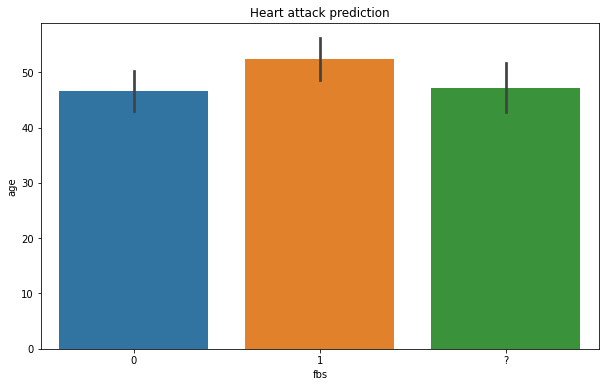

In [18]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Heart attack prediction")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['fbs'], y=df['age'])

# Add label for vertical axis
plt.ylabel("age")


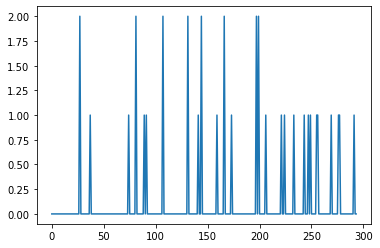

In [19]:
sns.lineplot(data=y)


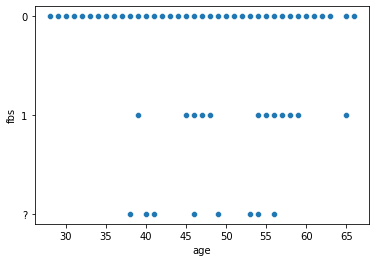

In [20]:
sns.scatterplot(data=df, x="age", y="fbs")

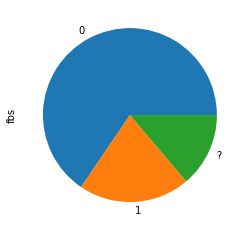

In [21]:
df['fbs'].value_counts().head(10).plot.pie()

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [24]:
nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [25]:
y_pred = nb.predict(x_test)
print(y_pred)

print(accuracy_score(y_test, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
0.847457627118644


In [26]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test, rfc_predict))

Accuracy: 0.9491525423728814
